# Regression to predict median house value
The data-> 'housing.csv'. <br>
1) Linear Regression
2) K-Nearest Neighbors Regression
3) Random Forest Regression
4) XGBoost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from skimage.io import imread
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from kneed import KneeLocator
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.shape

(20640, 10)

### Data pre-processing: remove NaN

In [4]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
housing['total_bedrooms'].fillna((housing['total_bedrooms'].mean()), inplace=True)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Data pre-processing: Convert categorical data to numerical data - "ocean_proximity"

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
categorical_columns=['ocean_proximity'] # must be a list
housing = pd.get_dummies(housing, columns=categorical_columns)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


### Visualize the data

Text(0.5, 1.0, 'median_income')

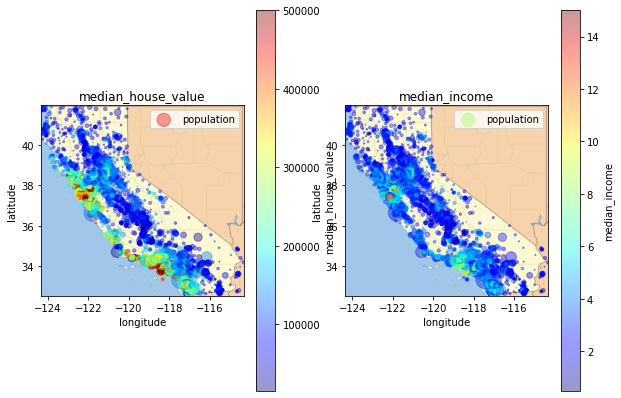

In [8]:
california_img = imread('california.png')
x1 = min(housing["longitude"].values)
x2 = max(housing["longitude"].values)
y1 = min(housing["latitude"].values)
y2 = max(housing["latitude"].values)
fig, ax =plt.subplots(1,2)
housing.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
             s=housing['population']/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"),
             colorbar=True, alpha=0.4, figsize=(10,7))

ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('median_house_value')
housing.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
             s=housing['population']/100, label="population",
             c="median_income", cmap=plt.get_cmap("jet"),
             colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('median_income')

### Prepare the Training and Testing Datasets

In [9]:
X=housing.drop(['median_house_value'], axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [10]:
Y=housing['median_house_value']
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [11]:
X_columns=X.columns 
X=X.values
Y=Y.values

In [12]:
#training, validation, testing split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
print('train:', X_train.shape, Y_train.shape)
print('validation:', X_val.shape, Y_val.shape)
print('test:', X_test.shape, Y_test.shape)

train: (14860, 13) (14860,)
validation: (1652, 13) (1652,)
test: (4128, 13) (4128,)


In [13]:
#normalization
scaler=MinMaxScaler()
scaler.fit(X_train) 
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [14]:
type(X_train)

numpy.ndarray

(1) Linear regression model to predict Y given X <br>
(2) KNN regression model to predict Y given X  <br>
(3) Random-forest regression model to predict Y given X  <br>

### 1. Linear Regression 

In [96]:
linear_model=LinearRegression()
linear_model

LinearRegression()

In [97]:
linear_model.fit(X_train,Y_train)

LinearRegression()

In [98]:
Y_train_pred = linear_model.predict(X_train)
Y_test_pred = linear_model.predict(X_test)
type(Y_test_pred)

numpy.ndarray

In [99]:
print('Evaluate model on traning set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on traning set
MSE= 4675883082.884457
MAE= 49675.60703126144
MAPE= 0.2870038556012951
Evaluate model on testing set
MSE= 4715994821.142622
MAE= 49655.95240199434
MAPE= 0.2895136136935612


In [100]:
print('R2 on training set',linear_model.score(X_train,Y_train))
print('R2 on testing set',linear_model.score(X_test,Y_test))

R2 on training set 0.6506129676781593
R2 on testing set 0.6383314474472391


Text(0, 0.5, 'Y_train_pred')

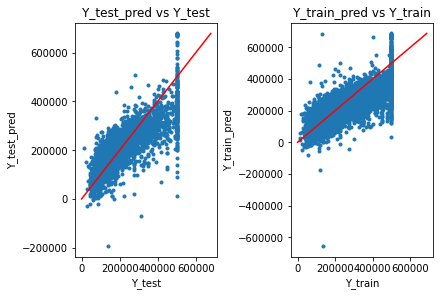

In [101]:
fig, ax = plt.subplots(1,2,constrained_layout=True)
ax[0].set_title('Y_test_pred vs Y_test')
ax[0].plot(Y_test, Y_test_pred, '.')
ymax=np.max([Y_test.max(), Y_test_pred.max()])
ax[0].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[0].set_xlabel('Y_test')
ax[0].set_ylabel('Y_test_pred')
ax[1].set_title('Y_train_pred vs Y_train')
ax[1].plot(Y_train, Y_train_pred, '.')
ymax=np.max([Y_train.max(), Y_train_pred.max()])
ax[1].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[1].set_xlabel('Y_train')
ax[1].set_ylabel('Y_train_pred')

Text(0.5, 1.0, 'prediction')

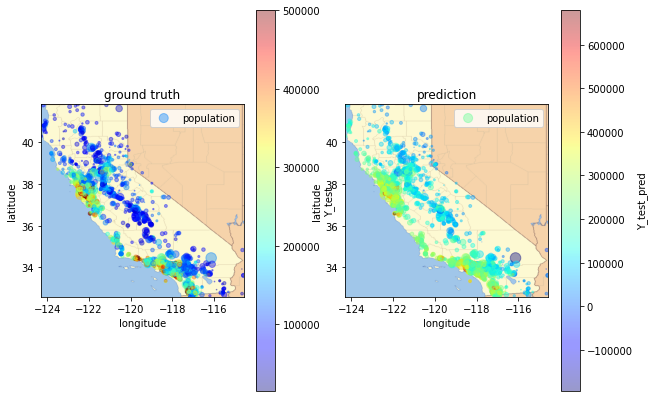

In [102]:
data=scaler.inverse_transform(X_test)
data=pd.DataFrame(data, columns=X_columns)
data['Y_test']=Y_test
data['Y_test_pred']=Y_test_pred

x1 = min(data["longitude"].values)
x2 = max(data["longitude"].values)
y1 = min(data["latitude"].values)
y2 = max(data["latitude"].values)

fig, ax =plt.subplots(1,2)
data.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('ground truth')
data.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test_pred", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('prediction')

In [104]:
Y_test.shape

(4128,)

### 2. KNeighborsRegressor 

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train_s, Y_train)
Y_test_pred = knn.predict(X_test_s)
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

In [106]:
knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [107]:
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [108]:
Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)
type(Y_test_pred)

numpy.ndarray

In [109]:
print('Evaluate model on traning set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on traning set
MSE= 2536673978.865168
MAE= 33662.21060565276
MAPE= 0.18121674624371772
Evaluate model on testing set
MSE= 3995148983.11626
MAE= 42816.31531007752
MAPE= 0.23257627257406085


In [111]:
print('R2 on training set',knn.score(X_train,Y_train))
print('R2 on testing set',knn.score(X_test,Y_test))

R2 on training set 0.8104569815511709
R2 on testing set 0.6936129481146869


Text(0, 0.5, 'Y_train_pred')

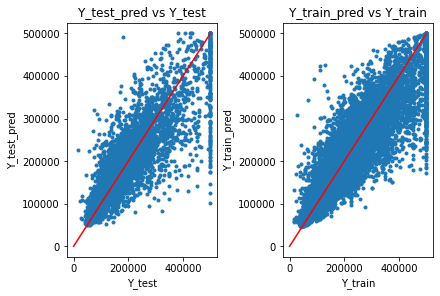

In [112]:
fig, ax = plt.subplots(1,2,constrained_layout=True)
ax[0].set_title('Y_test_pred vs Y_test')
ax[0].plot(Y_test, Y_test_pred, '.')
ymax=np.max([Y_test.max(), Y_test_pred.max()])
ax[0].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[0].set_xlabel('Y_test')
ax[0].set_ylabel('Y_test_pred')
ax[1].set_title('Y_train_pred vs Y_train')
ax[1].plot(Y_train, Y_train_pred, '.')
ymax=np.max([Y_train.max(), Y_train_pred.max()])
ax[1].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[1].set_xlabel('Y_train')
ax[1].set_ylabel('Y_train_pred')

Text(0.5, 1.0, 'prediction')

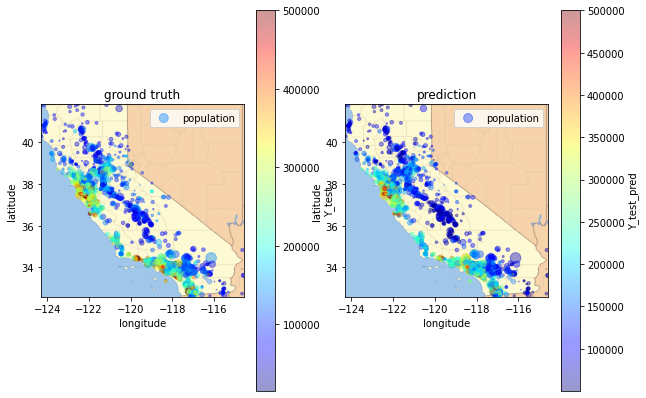

In [113]:
data=scaler.inverse_transform(X_test)
data=pd.DataFrame(data, columns=X_columns)
data['Y_test']=Y_test
data['Y_test_pred']=Y_test_pred

x1 = min(data["longitude"].values)
x2 = max(data["longitude"].values)
y1 = min(data["latitude"].values)
y2 = max(data["latitude"].values)

fig, ax =plt.subplots(1,2)
data.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('ground truth')
data.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test_pred", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('prediction')

### 3. RandomForestRegressor

In [15]:
RF = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=0)


In [16]:
RF.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10, n_estimators=20, random_state=0)

In [17]:
Y_train_pred = RF.predict(X_train)
Y_test_pred = RF.predict(X_test)
type(Y_test_pred)

numpy.ndarray

In [18]:
print('Evaluate model on traning set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on traning set
MSE= 1945491639.701538
MAE= 30476.40665806301
MAPE= 0.17315781021344928
Evaluate model on testing set
MSE= 2942752580.893462
MAE= 36889.27001864772
MAPE= 0.20957638311965976


In [19]:
print('R2 on training set',RF.score(X_train,Y_train))
print('R2 on testing set',RF.score(X_test,Y_test))

R2 on training set 0.8546307642100066
R2 on testing set 0.7743209848998999


Text(0, 0.5, 'Y_train_pred')

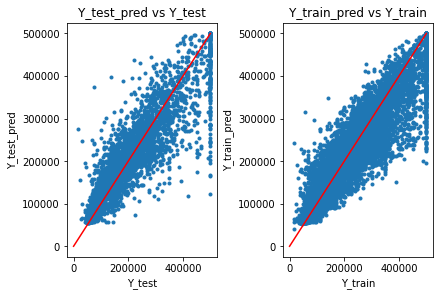

In [20]:
fig, ax = plt.subplots(1,2,constrained_layout=True)
ax[0].set_title('Y_test_pred vs Y_test')
ax[0].plot(Y_test, Y_test_pred, '.')
ymax=np.max([Y_test.max(), Y_test_pred.max()])
ax[0].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[0].set_xlabel('Y_test')
ax[0].set_ylabel('Y_test_pred')
ax[1].set_title('Y_train_pred vs Y_train')
ax[1].plot(Y_train, Y_train_pred, '.')
ymax=np.max([Y_train.max(), Y_train_pred.max()])
ax[1].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[1].set_xlabel('Y_train')
ax[1].set_ylabel('Y_train_pred')

Text(0.5, 1.0, 'prediction')

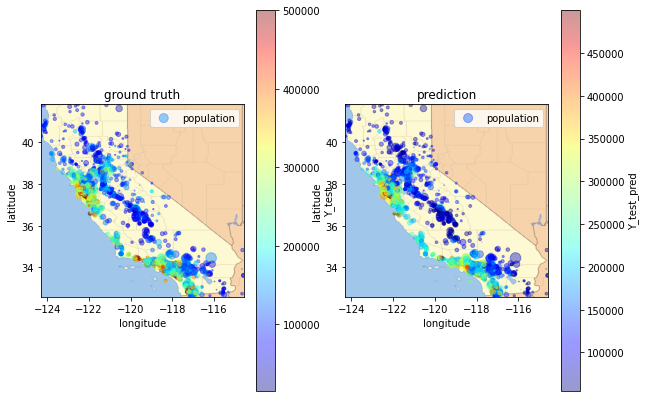

In [21]:
data=scaler.inverse_transform(X_test)
data=pd.DataFrame(data, columns=X_columns)
data['Y_test']=Y_test
data['Y_test_pred']=Y_test_pred

x1 = min(data["longitude"].values)
x2 = max(data["longitude"].values)
y1 = min(data["latitude"].values)
y2 = max(data["latitude"].values)

fig, ax =plt.subplots(1,2)
data.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('ground truth')
data.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test_pred", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('prediction')

### 3. Optimal max_depth for our RandomForestRegressor


In [123]:
max_depth_list=np.arange(1,101,10)
max_depth_list

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [124]:
MAE_train_list=[]
MAE_val_list=[]

for i in range(0,len(max_depth_list)):
    RF=RandomForestRegressor(n_estimators=20,max_depth=max_depth_list[i], random_state=0)
    RF.fit(X_train, Y_train)
    Y_train_pred=RF.predict(X_train)
    MAE_train = np.mean(np.abs(Y_train - Y_train_pred))
    
    Y_val_pred=RF.predict(X_val)
    MAE_val = np.mean(np.abs(Y_val - Y_val_pred))
    
    MAE_train_list.append(MAE_train)
    MAE_val_list.append(MAE_val)
print(MAE_train_list)
print(MAE_val_list)


[73350.39113411319, 27431.75522589921, 13249.055125209657, 12762.299232383812, 12744.596086810228, 12744.596086810228, 12744.596086810228, 12744.596086810228, 12744.596086810228, 12744.596086810228]
[73113.4835500284, 36793.3698123538, 33959.70593688395, 33967.662812863084, 33905.302421307504, 33905.302421307504, 33905.302421307504, 33905.302421307504, 33905.302421307504, 33905.302421307504]


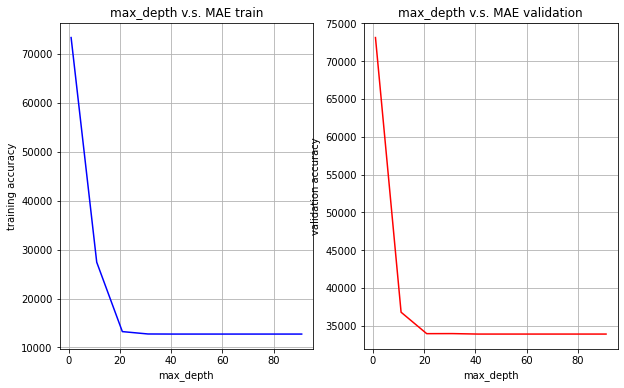

In [126]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(max_depth_list, MAE_train_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training accuracy')
ax[0].set_title('max_depth v.s. MAE train')
ax[0].grid(True)
ax[1].plot(max_depth_list, MAE_val_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation accuracy')
ax[1].set_title('max_depth v.s. MAE validation')
ax[1].grid(True)

In [129]:
knee= KneeLocator(max_depth_list, MAE_val_list, curve="convex", direction="decreasing")
max_depth_best=knee.elbow
print('best max depth using knee locator',max_depth_best)
print('best max depth by eyeballing where val accuracy turns flat',20)

best max depth using knee locator 11
best max depth by eyeballing where val accuracy turns flat 20


In [22]:
RF=RandomForestRegressor(n_estimators=20,max_depth=20, random_state=0)
RF.fit(X_train, Y_train)
Y_train_pred=RF.predict(X_train)


Y_test_pred=RF.predict(X_test)

print('Evaluate model on training set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on training set
MSE= 435606661.65019244
MAE= 13579.964241328715
MAPE= 0.07572628237193048
Evaluate model on testing set
MSE= 2451979002.3817043
MAE= 32557.09369858054
MAPE= 0.18540296962723968


MAPE on the test set is reduced by using max_depth=20

<BarContainer object of 13 artists>

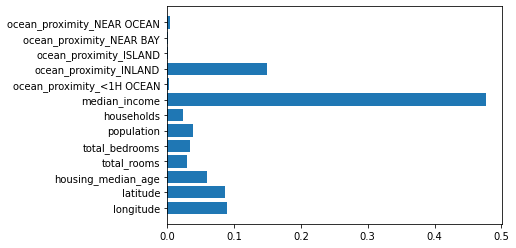

In [133]:
plt.barh(y=X_columns, width=RF.feature_importances_)

### 4. XGBRegressor

In [16]:
max_depth_list=np.arange(1,31,1)
max_depth_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [24]:
MAE_train_list=[]
MAE_val_list=[]

for i in range(0,len(max_depth_list)):
    XGB=XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 20,max_depth=max_depth_list[i], random_state=0)
    
    XGB.fit(X_train, Y_train)
    
    
    Y_train_pred=XGB.predict(X_train)
    MAE_train = np.mean(np.abs(Y_train - Y_train_pred))
    
    Y_val_pred=XGB.predict(X_val)
    MAE_val = np.mean(np.abs(Y_val - Y_val_pred))
    
    MAE_train_list.append(MAE_train)
    MAE_val_list.append(MAE_val)


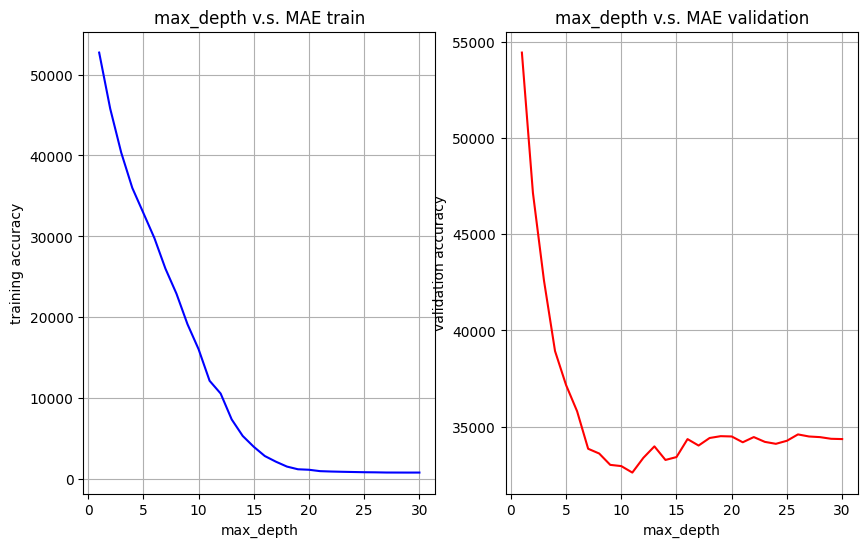

In [26]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(max_depth_list, MAE_train_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training accuracy')
ax[0].set_title('max_depth v.s. MAE train')
ax[0].grid(True)
ax[1].plot(max_depth_list, MAE_val_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation accuracy')
ax[1].set_title('max_depth v.s. MAE validation')
ax[1].grid(True)

In [ ]:
max_depth_best_loop=max_depth_list[np.argmin(MAE_val_list)]
max_depth_best_loop

In [17]:
#best parameter using grid search
search_space={
    'max_depth':max_depth_list
}
XGB=XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 20,random_state=0)

GS = GridSearchCV(estimator = XGB,
               param_grid = search_space,
               scoring = ['r2','neg_root_mean_squared_error'],
               refit='r2',
               cv = 10)
GS.fit(X_train,Y_train)
print(GS.best_estimator_)
print(GS.best_params_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
{'max_depth': 8}


In [18]:
XGB=XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 20,max_depth=8, random_state=0)
XGB.fit(X_train, Y_train)
Y_train_pred=XGB.predict(X_train)
Y_test_pred=XGB.predict(X_test)

print('Evaluate model on training set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on training set
MSE= 1095940893.1436427
MAE= 22894.503457399267
MAPE= 0.12936440927928186
Evaluate model on testing set
MSE= 2358619638.3601184
MAE= 32554.13655315074
MAPE= 0.18348040887596298


In [52]:
XGB=XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 20,max_depth=11, random_state=0)
XGB.fit(X_train, Y_train)
Y_train_pred=XGB.predict(X_train)
Y_test_pred=XGB.predict(X_test)

print('Evaluate model on training set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on traning set
MSE= 2079233623.013216
MAE= 31072.655602485174
MAPE= 0.1364140154175004
Evaluate model on test set
MSE= 3383757105.7336435
MAE= 38170.73729806353
MAPE= 0.17890332137982304


XGBoost slightly better than random forest